In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_data = tf.keras.utils.image_dataset_from_directory(
    "../src/data/chest_xray/train",
    validation_split = 0.0,
    image_size = (256, 256))


test_data = tf.keras.utils.image_dataset_from_directory(
    "../src/data/chest_xray/test",
    validation_split = 0.0,
    image_size = (256, 256))


Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [42]:
class_names = train_data.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


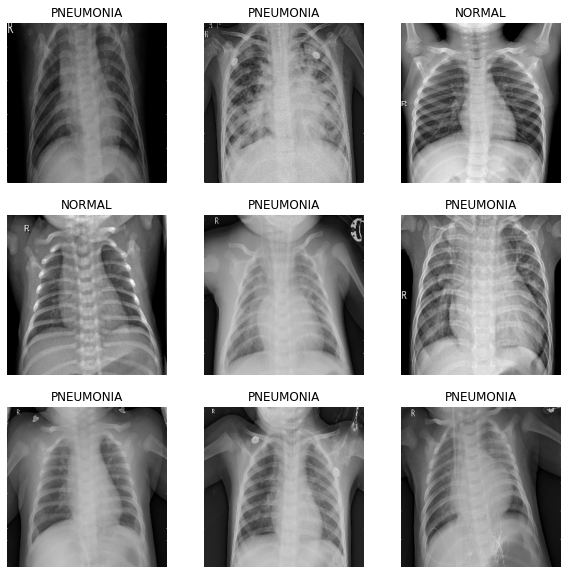

In [43]:
plt.figure(figsize = (10, 10))
for images, labels in train_data.take(1):
    for i in range (9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        

In [79]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(32, 5, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, 5, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, 2, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(2))


In [80]:
model.compile(
    optimizer = 'adam',
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'])

In [81]:
try: 
    model.fit(
    train_data,
    validation_data=test_data,
    epochs=100)
except KeyboardInterrupt:
    model.save("pneumonia_classifier_v1.h5")

Epoch 1/100
163/163 [==============================] - 655s 4s/step - loss: 0.6155 - accuracy: 0.7214 - val_loss: 0.6766 - val_accuracy: 0.6250
Epoch 2/100
163/163 [==============================] - 640s 4s/step - loss: 0.5756 - accuracy: 0.7429 - val_loss: 0.6928 - val_accuracy: 0.6250
Epoch 3/100
163/163 [==============================] - 641s 4s/step - loss: 0.5735 - accuracy: 0.7429 - val_loss: 0.6907 - val_accuracy: 0.6250
Epoch 4/100
163/163 [==============================] - 633s 4s/step - loss: 0.5709 - accuracy: 0.7429 - val_loss: 0.6910 - val_accuracy: 0.6250
Epoch 5/100
163/163 [==============================] - 640s 4s/step - loss: 0.5706 - accuracy: 0.7429 - val_loss: 0.6929 - val_accuracy: 0.6250
Epoch 6/100
163/163 [==============================] - 657s 4s/step - loss: 0.5718 - accuracy: 0.7429 - val_loss: 0.6924 - val_accuracy: 0.6250
Epoch 7/100
163/163 [==============================] - 636s 4s/step - loss: 0.5714 - accuracy: 0.7429 - val_loss: 0.6943 - val_accuracy: